In [2]:
import pandas as pd

In [3]:
dfClientes = pd.read_excel('caso_estudo.xlsx', sheet_name='clientes')
dfLojas = pd.read_excel('caso_estudo.xlsx', sheet_name='lojas')
dfProdutos = pd.read_excel('caso_estudo.xlsx', sheet_name='produtos')
dfVendas = pd.read_excel('caso_estudo.xlsx', sheet_name='vendas')
dfPagamentos = pd.read_excel('caso_estudo.xlsx', sheet_name='pagamentos')

## Análise preliminar

In [4]:
dfClientes[dfClientes.isnull().T.any()]

,id,nome,sexo,dt_nasc
263,264,NaN,F,7/29/1997
264,265,NaN,M,2/7/1979
268,269,NaN,F,NaN
269,270,NaN,M,NaN
276,277,Brenda Santos,F,NaN
282,283,Amanda Barros,F,NaN
287,288,Victor Ribeiro,NaN,12/17/1974
290,291,Clara Pinto,NaN,12/25/1980
294,295,Tiago Lima,NaN,7/26/1973
301,302,Guilherme Cardoso,NaN,3/9/1998


In [5]:
dfClientes.sexo.unique()

array(['F', 'M', nan], dtype=object)

<AxesSubplot: >

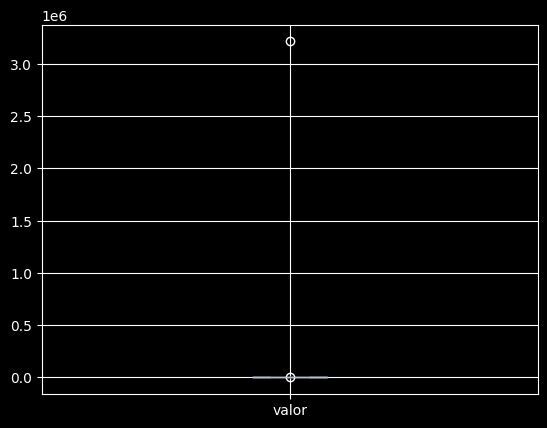

In [6]:
dfProdutos.boxplot(column=['valor'])

<AxesSubplot: >

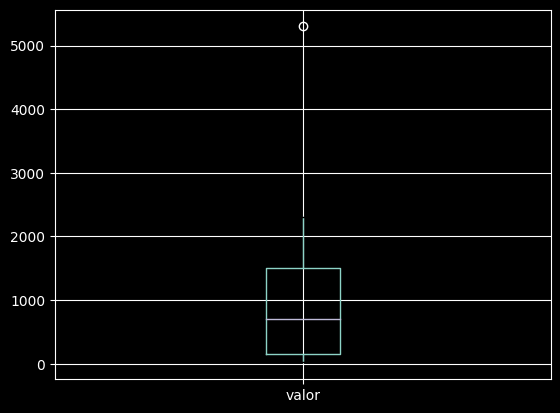

In [7]:
dfProdutos[dfProdutos.valor < 3000000].boxplot(column=['valor'])

In [8]:
dfVendas.describe()

,id,id_cliente,id_loja,id_produto
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,500.763667,4.538333,4.435000
std,866.169729,285.322282,2.922221,2.511018
min,1.000000,1.000000,1.000000,1.000000
25%,750.750000,254.750000,2.000000,3.000000
50%,1500.500000,503.500000,4.000000,3.000000
75%,2250.250000,742.000000,7.000000,6.000000
max,3000.000000,1000.000000,10.000000,10.000000


In [9]:
dfPagamentos.describe()

,id,id_venda
count,2072.000000,2072.000000
mean,1036.500000,1491.731660
std,598.279199,864.865583
min,1.000000,1.000000
25%,518.750000,746.250000
50%,1036.500000,1501.500000
75%,1554.250000,2220.500000
max,2072.000000,2997.000000


## Data Clean

#### Dados nulos

In [10]:
dfClientes.loc[dfClientes.nome.isnull(), 'nome'] = 'Sem Nome'
dfClientes.loc[dfClientes.sexo.isnull(), 'sexo'] = 'O'
dfClientes.loc[dfClientes.dt_nasc.isnull(), 'dt_nasc'] = '1/1/2020'


In [11]:
dfClientes.isnull().sum()

id         0
nome       0
sexo       0
dt_nasc    0
dtype: int64

### Outliers

In [12]:
dfProdutos.loc[9, 'valor'] = dfProdutos.valor[9]/10000
dfProdutos

,id,produto,valor
0,1,mouse,20.0000
1,2,teclado,30.0000
2,3,laptop básico,2300.0000
3,4,laptop gamer,5300.0000
4,5,monitor,1500.0000
5,6,impressora,700.0000
6,7,carregador,150.0000
7,8,cadeira,540.0000
8,9,mesa,860.0000
9,10,xxx-231a,321.1352


<AxesSubplot: >

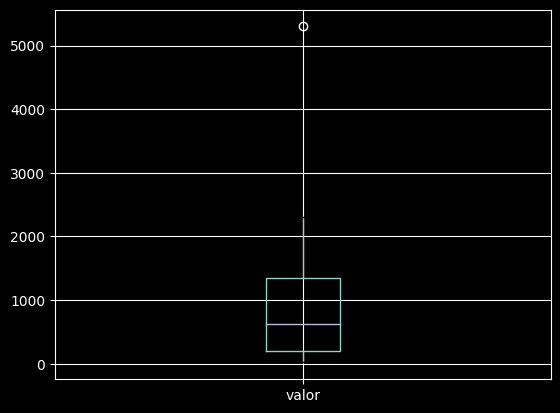

In [13]:
dfProdutos.boxplot(column=['valor'])

### Consistência

#### Verificar se os ids das tabelas associadas estão todos presentes

In [14]:
dfVendas[~dfVendas.id_cliente.isin(dfClientes.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [15]:
dfVendas[~dfVendas.id_loja.isin(dfLojas.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [16]:
dfVendas[~dfVendas.id_produto.isin(dfProdutos.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [17]:
dfPagamentos[~dfPagamentos.id_venda.isin(dfVendas.id)]

,id,id_venda,dt_pgto


In [18]:
# quantas vendas não tem pagamentos
dfVendas[~dfVendas.id.isin(dfPagamentos.id_venda)].count()

id            928
id_cliente    928
id_loja       928
id_produto    928
dt_venda      928
dtype: int64

## Dados Duplicados

In [19]:
dfClientes[dfClientes.nome=='Anna Melo']

,id,nome,sexo,dt_nasc
66,67,Anna Melo,F,11/6/1995
79,80,Anna Melo,F,8/10/1999


In [20]:
# Verificar dados duplicados excluindo da consulta a coluna id, esse comando respresnta toda a linha
dfClientes.drop('id', axis=1).duplicated().sum()

0

In [21]:
dfProdutos.produto.duplicated().sum()

0

In [22]:
dfLojas.cidade.duplicated().sum()

0

In [23]:
dfVendas[dfVendas.drop('id', axis=1).duplicated()]

,id,id_cliente,id_loja,id_produto,dt_venda
496,497,559,2,5,2018-06-22


In [24]:
dfVendas[(dfVendas.id_cliente == 559) & (dfVendas.id_produto == 5) & (dfVendas.id_loja == 2)]

,id,id_cliente,id_loja,id_produto,dt_venda
495,496,559,2,5,2018-06-22
496,497,559,2,5,2018-06-22


In [25]:
dfPagamentos.drop('id', axis=1).duplicated().sum()

0

### Formato de dados

In [26]:
dfClientes.dt_nasc = pd.to_datetime(dfClientes.dt_nasc, format='%m/%d/%Y')
dfClientes

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,1975-05-02
1,2,Caio Pereira,M,1978-04-16
2,3,Júlio Azevedo,M,1952-11-04
3,4,Sarah Goncalves,F,1937-02-24
4,5,Gabrielle Martins,F,1953-05-06
...,...,...,...,...
995,996,Ágatha Ribeiro,F,1946-02-08
996,997,Laura Oliveira,F,1979-06-15
997,998,Lara Oliveira,F,1946-03-15
998,999,Julian Cunha,M,1994-06-20


### Indexes

In [27]:
dfClientes = dfClientes.set_index('id')
dfLojas = dfLojas.set_index('id')
dfProdutos = dfProdutos.set_index('id')
dfVendas = dfVendas.set_index('id')
dfPagamentos = dfPagamentos.set_index('id')
dfClientes

,nome,sexo,dt_nasc
id,,,
1,Lavinia Sousa,F,1975-05-02
2,Caio Pereira,M,1978-04-16
3,Júlio Azevedo,M,1952-11-04
4,Sarah Goncalves,F,1937-02-24
5,Gabrielle Martins,F,1953-05-06
...,...,...,...
996,Ágatha Ribeiro,F,1946-02-08
997,Laura Oliveira,F,1979-06-15
998,Lara Oliveira,F,1946-03-15


## Data Fusion

In [28]:
# Com todas as tableas indexadas é possível fazer os joins
df = dfVendas.join(dfClientes.add_prefix('client_'), on='id_cliente')
df = df.join(dfLojas.add_prefix('loja_'), on='id_loja')
df = df.join(dfProdutos.add_prefix('produto_'), on='id_produto')

In [29]:
df = df.join(dfPagamentos.set_index('id_venda'))
df

,id_cliente,id_loja,id_produto,dt_venda,client_nome,client_sexo,client_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto
id,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23
...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT


In [30]:
df.isnull().sum()

id_cliente           0
id_loja              0
id_produto           0
dt_venda             0
client_nome          0
client_sexo          0
client_dt_nasc       0
loja_cidade          0
produto_produto      0
produto_valor        0
dt_pgto            928
dtype: int64

## Feature Engineering (criar novos dados para o uso na analíse)

In [31]:
df['pg'] = 1
df.loc[df.dt_pgto.isnull(), 'pg'] = 0
df

,id_cliente,id_loja,id_produto,dt_venda,client_nome,client_sexo,client_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg
id,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0


In [32]:
df['tempo_pg'] = (df.dt_pgto - df.dt_venda).dt.days
df

,id_cliente,id_loja,id_produto,dt_venda,client_nome,client_sexo,client_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg
id,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN


In [33]:
import numpy as np
df['cliente_idade'] = np.floor((pd.to_datetime('today') - df.client_dt_nasc)/np.timedelta64(1,'Y'))
df

,id_cliente,id_loja,id_produto,dt_venda,client_nome,client_sexo,client_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade
id,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,73.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,50.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,60.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,81.0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0,23.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0,28.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN,36.0


## Relatórios

### Lojas que mais vendem

In [34]:
graf_dados = df.groupby('loja_cidade').count().produto_valor.sort_values(ascending=False)
graf_dados

loja_cidade
Rio de Janeiro    1087
Salvador           234
Vitória            231
Brasília           223
Belo Horizonte     221
Recife             211
São Paulo          207
Palmas             202
Curitiba           193
Santa Catarina     191
Name: produto_valor, dtype: int64

Text(0.5, 1.0, 'Vendas por Loja')

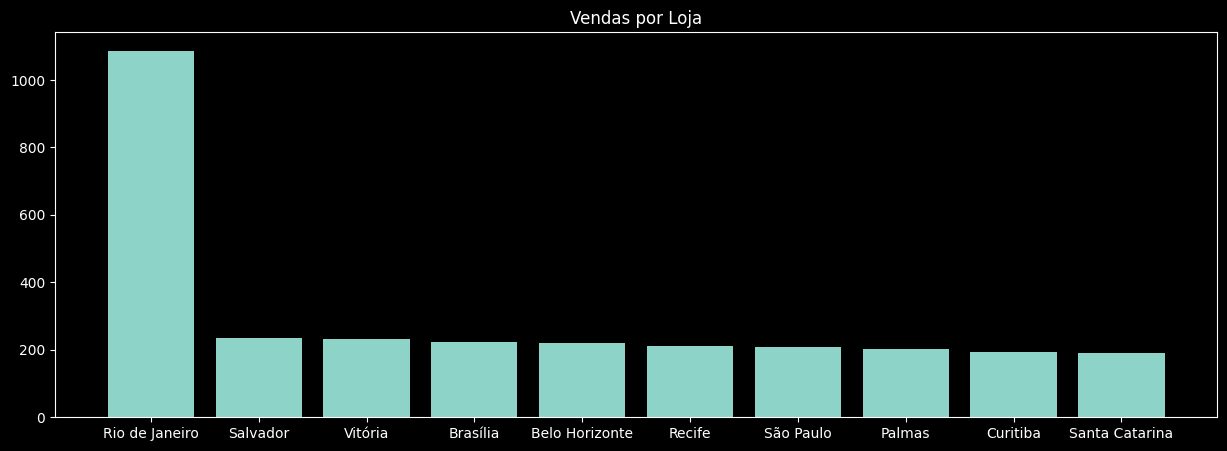

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Vendas por Loja')

### Produtos que mais vendem

In [36]:
graf_dados = df.groupby('produto_produto').count().produto_valor.sort_values(ascending=False)
graf_dados

produto_produto
laptop básico    1395
teclado           204
impressora        191
monitor           187
xxx-231a          182
laptop gamer      180
mouse             172
mesa              171
carregador        164
cadeira           154
Name: produto_valor, dtype: int64

Text(0.5, 1.0, 'Vendas por produto')

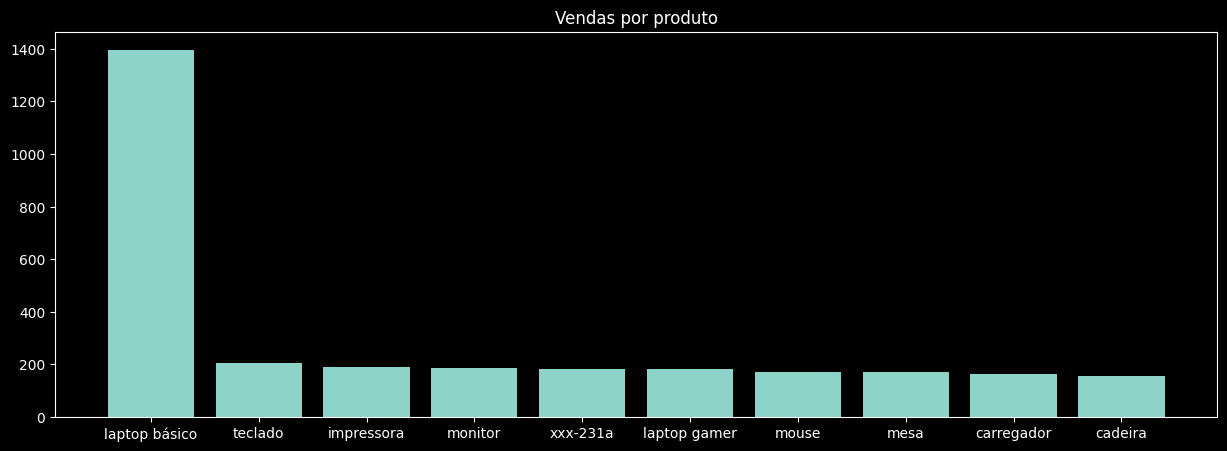

In [37]:
plt.figure(figsize=(15, 5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Vendas por produto')

### Receita por loja

In [65]:
graf_dados = df[['loja_cidade', 'produto_valor']].groupby('loja_cidade').sum().produto_valor.sort_values(ascending=False)
graf_dados

loja_cidade
Rio de Janeiro    1.797907e+06
Brasília          3.779836e+05
Belo Horizonte    3.757225e+05
Salvador          3.752382e+05
Vitória           3.655850e+05
São Paulo         3.407579e+05
Recife            3.329236e+05
Palmas            3.168370e+05
Santa Catarina    3.133314e+05
Curitiba          3.032404e+05
Name: produto_valor, dtype: float64

Text(0.5, 1.0, 'Receita por Loja')

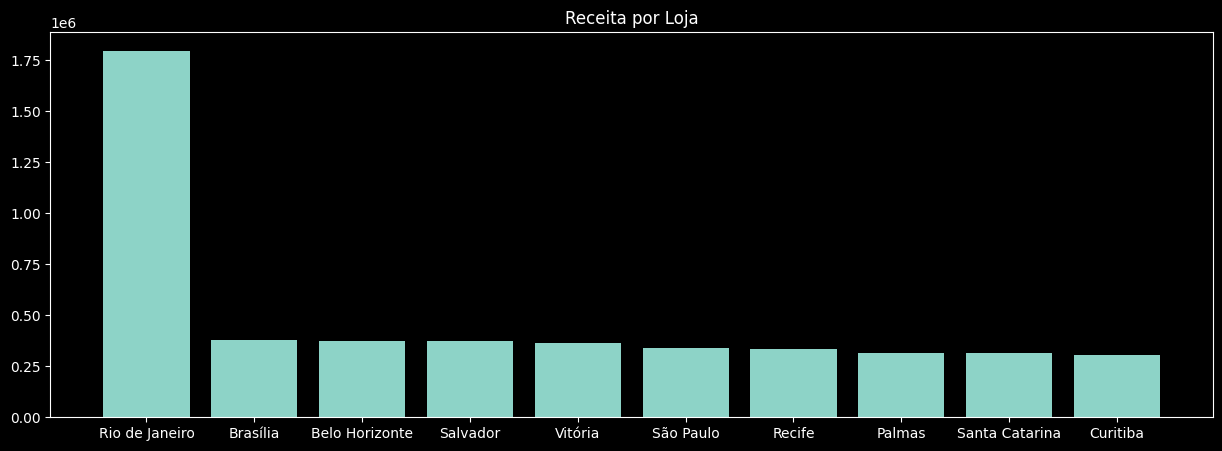

In [48]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Receita por Loja')

In [68]:
print('O maior valor é %i, sendo %.2f vezes a média dos demais, que é %i' % (graf_dados.max(), graf_dados.max()/graf_dados[graf_dados!=graf_dados.max()].mean(), graf_dados[graf_dados!=graf_dados.max()].mean() ))

O maior valor é 1797906, sendo 5.22 vezes a média dos demais, que é 344624


### Receita por produto

In [78]:
graf_dados = df[['produto_produto', 'produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending=False)
graf_dados

produto_produto
laptop básico    3.208500e+06
laptop gamer     9.540000e+05
monitor          2.805000e+05
mesa             1.470600e+05
impressora       1.337000e+05
cadeira          8.316000e+04
xxx-231a         5.844661e+04
carregador       2.460000e+04
teclado          6.120000e+03
mouse            3.440000e+03
Name: produto_valor, dtype: float64

Text(0.5, 1.0, 'Receita por produto')

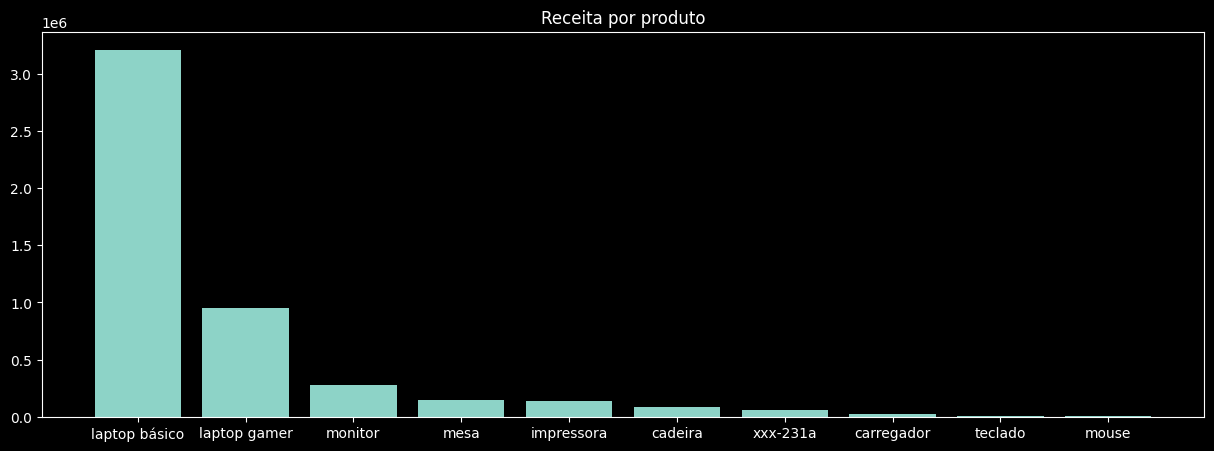

In [81]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Receita por produto')